In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd
%matplotlib inline

In [2]:
# load training and test data set from file
df = pd.read_csv("../data/Vowel.txt")
features = [f'x.{i+1}' for i in range(10)]
X_train, y_train = df[df.is_train==1][features].values, df[df.is_train==1].y.values
X_test, y_test = df[df.is_train==0][features].values, df[df.is_train==0].y.values

In [3]:
colors = np.array(['',        '#000000', '#0000FF', '#A52A2A', 
                   '#A020F0', '#FF8C00', '#00FFFF', '#708090', 
                   '#FFEC8B', '#000000', '#FF0000', '#00FF00'])

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [11]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r = lda.fit(X_train, y_train).transform(X_train)
train_error_rate = 1 - accuracy_score(y_train, lda.predict(X_train))
test_error_rate = 1 - accuracy_score(y_test, lda.predict(X_test))
print(f'Linear discriminant analysis {train_error_rate:.2f} {test_error_rate:.2f}')

Linear discriminant analysis 0.32 0.56


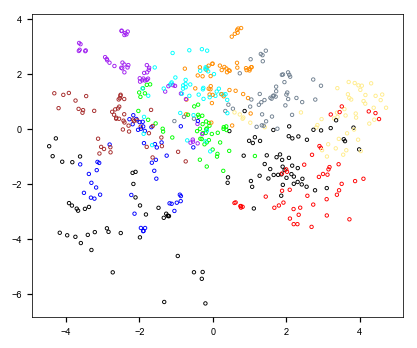

In [98]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.linewidth'] = 0.5
fig, ax1 = plt.subplots(figsize=(4.35, 3.65), dpi=110)
ax1.scatter(X_r[:, 0], X_r[:, 1], facecolors='none', edgecolors=colors[y_train], 
            s=5, linewidth=0.6)
for i in ax1.get_yticklabels() + ax1.get_xticklabels():
    i.set_fontsize(6)